# Restaurant Order Analysis

## Project Objective
- The Objective of the project is to analyze a quarter worth of orders from a fictitious restaurant serving international cuisine.

### Recommended Analysis

### Import the Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#import the data
orders = pd.read_csv('order_details.csv')
menu = pd.read_csv('menu_items.csv')

In [3]:
#display first few rows of the orders table
orders.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0


In [4]:
#display the first few rows of the menu table
menu.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


### Data Wrangling (Orders Table)

In [5]:
#understanding the shape 
orders.shape

(12234, 5)

- orders contain about 12,234 orders made by customers

In [6]:
#Checking for missing values
orders.isna().sum()

order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64

- There are 137 orders item_id missing

In [7]:
#display the missing items
orders[orders['item_id'].isna()]

,order_details_id,order_id,order_date,order_time,item_id
121,122,50,1/1/23,6:41:01 PM,NaN
297,298,125,1/2/23,8:31:06 PM,NaN
357,358,147,1/3/23,2:32:51 PM,NaN
386,387,161,1/3/23,4:43:46 PM,NaN
469,470,200,1/3/23,10:24:05 PM,NaN
...,...,...,...,...,...
11716,11717,5149,3/28/23,2:48:50 PM,NaN
11903,11904,5225,3/29/23,5:40:52 PM,NaN
11906,11907,5226,3/29/23,5:43:56 PM,NaN
12021,12022,5281,3/30/23,4:56:04 PM,NaN


- Since the missing values constitute just about 1% of the data, we will drop the missing values
- Secondly, these missing item_id has made it impossible to know the menu item and categeory of the orders, so we will drop them

In [8]:
#checking for duplicates
orders.duplicated().sum()

0

- There are no duplicates in the orders table

In [9]:
#checking the datatypes
orders.dtypes

order_details_id      int64
order_id              int64
order_date           object
order_time           object
item_id             float64
dtype: object

- The order_date is an object datatype instead of datetime
- The order_time is an object datatype instead of time

### Data Cleaning (Orders table)

#### Make a Copy

In [10]:
#make a copy of the orders table
orders_copy = orders.copy()

#### Dropping the missing values

In [11]:
#drop the missing values
orders_copy.dropna(inplace=True)

In [12]:
#confirming the missing values have been dropped
orders_copy.isna().sum()

order_details_id    0
order_id            0
order_date          0
order_time          0
item_id             0
dtype: int64

#### Changing Datatype

In [13]:
#changing the datatype of order_date
orders_copy['order_date'] = orders_copy['order_date'].astype('datetime64')

In [14]:
#confirm the datatype of order_date
orders_copy.dtypes

order_details_id             int64
order_id                     int64
order_date          datetime64[ns]
order_time                  object
item_id                    float64
dtype: object

In [15]:
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,2023-01-01,11:38:36 AM,109.0
1,2,2,2023-01-01,11:57:40 AM,108.0
2,3,2,2023-01-01,11:57:40 AM,124.0
3,4,2,2023-01-01,11:57:40 AM,117.0
4,5,2,2023-01-01,11:57:40 AM,129.0


#### Feature Engineering

In [16]:
#creating the date_time column
orders_copy['date_time'] = orders_copy['order_date'].astype('str') + " " + orders_copy['order_time']

In [17]:
#checking if the column has been created
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id,date_time
0,1,1,2023-01-01,11:38:36 AM,109.0,2023-01-01 11:38:36 AM
1,2,2,2023-01-01,11:57:40 AM,108.0,2023-01-01 11:57:40 AM
2,3,2,2023-01-01,11:57:40 AM,124.0,2023-01-01 11:57:40 AM
3,4,2,2023-01-01,11:57:40 AM,117.0,2023-01-01 11:57:40 AM
4,5,2,2023-01-01,11:57:40 AM,129.0,2023-01-01 11:57:40 AM


In [18]:
#checking the datatype of the date_time column
orders_copy.dtypes

order_details_id             int64
order_id                     int64
order_date          datetime64[ns]
order_time                  object
item_id                    float64
date_time                   object
dtype: object

In [19]:
#converting the date_time column to datetime64
orders_copy['date_time'] = orders_copy['date_time'].astype('datetime64')

In [20]:
#extracting the year, month, day and hours
orders_copy['year'] = orders_copy['date_time'].dt.year
orders_copy['month'] = orders_copy['date_time'].dt.month
orders_copy['month_name'] = orders_copy['date_time'].dt.month_name()
orders_copy['day'] = orders_copy['date_time'].dt.day
orders_copy['day_name'] = orders_copy['date_time'].dt.day_name()
orders_copy['hour'] = orders_copy['date_time'].dt.hour

In [21]:
#display the head
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id,date_time,year,month,month_name,day,day_name,hour
0,1,1,2023-01-01,11:38:36 AM,109.0,2023-01-01 11:38:36,2023,1,January,1,Sunday,11
1,2,2,2023-01-01,11:57:40 AM,108.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11
2,3,2,2023-01-01,11:57:40 AM,124.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11
3,4,2,2023-01-01,11:57:40 AM,117.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11
4,5,2,2023-01-01,11:57:40 AM,129.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11


In [22]:
#extracting the time period (AM or PM)
orders_copy['time_period'] = orders_copy['order_time'].str[-2:]

In [23]:
#display the head
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id,date_time,year,month,month_name,day,day_name,hour,time_period
0,1,1,2023-01-01,11:38:36 AM,109.0,2023-01-01 11:38:36,2023,1,January,1,Sunday,11,AM
1,2,2,2023-01-01,11:57:40 AM,108.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM
2,3,2,2023-01-01,11:57:40 AM,124.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM
3,4,2,2023-01-01,11:57:40 AM,117.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM
4,5,2,2023-01-01,11:57:40 AM,129.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM


In [24]:
#checking unique months
orders_copy['month_name'].unique()

array(['January', 'February', 'March'], dtype=object)

In [25]:
#checking for unique days
orders_copy['day_name'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [26]:
#checking for unique years
orders_copy['year'].unique()

array([2023], dtype=int64)

In [27]:
#checking for unique order hours
orders_copy['hour'].unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10],
      dtype=int64)

In [28]:
#dropping unneeded columns
orders_copy.drop(['order_time', 'year'], inplace=True, axis=1)

In [29]:
#display head
orders_copy.head()

,order_details_id,order_id,order_date,item_id,date_time,month,month_name,day,day_name,hour,time_period
0,1,1,2023-01-01,109.0,2023-01-01 11:38:36,1,January,1,Sunday,11,AM
1,2,2,2023-01-01,108.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM
2,3,2,2023-01-01,124.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM
3,4,2,2023-01-01,117.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM
4,5,2,2023-01-01,129.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM


### Data Wrangling (Menu's Table)

In [30]:
#understanding the shape
menu.shape

(32, 4)

- There are 32 records in the menu table

In [31]:
#checking for missing values
menu.isna().sum()

menu_item_id    0
item_name       0
category        0
price           0
dtype: int64

- There are no missing values

In [32]:
#checking for duplicates
menu.duplicated().sum()

0

In [33]:
#checking the datatype
menu.dtypes

menu_item_id      int64
item_name        object
category         object
price           float64
dtype: object

In [34]:
#checking for number of categories
menu['category'].nunique()

4

- There are four categories of food sold

In [35]:
#checking for unique categories
menu['category'].unique()

array(['American', 'Asian', 'Mexican', 'Italian'], dtype=object)

In [36]:
#checking for number of items sold
menu['item_name'].nunique()

32

- There are 32 unique items sold

In [37]:
menu['item_name'].unique()

array(['Hamburger', 'Cheeseburger', 'Hot Dog', 'Veggie Burger',
       'Mac & Cheese', 'French Fries', 'Orange Chicken', 'Tofu Pad Thai',
       'Korean Beef Bowl', 'Pork Ramen', 'California Roll', 'Salmon Roll',
       'Edamame', 'Potstickers', 'Chicken Tacos', 'Steak Tacos',
       'Chicken Burrito', 'Steak Burrito', 'Chicken Torta', 'Steak Torta',
       'Cheese Quesadillas', 'Chips & Salsa', 'Chips & Guacamole',
       'Spaghetti', 'Spaghetti & Meatballs', 'Fettuccine Alfredo',
       'Meat Lasagna', 'Cheese Lasagna', 'Mushroom Ravioli',
       'Shrimp Scampi', 'Chicken Parmesan', 'Eggplant Parmesan'],
      dtype=object)

In [38]:
#renaming the menu_item_id column to item_id
menu.rename(columns={
    'menu_item_id': 'item_id'
}, inplace=True)

### Merging the tables

In [39]:
## Merging the two tables
df = orders_copy.merge(menu, on='item_id', how='left')

In [40]:
#display first 5 record of the dataframe
df.head()

,order_details_id,order_id,order_date,item_id,date_time,month,month_name,day,day_name,hour,time_period,item_name,category,price
0,1,1,2023-01-01,109.0,2023-01-01 11:38:36,1,January,1,Sunday,11,AM,Korean Beef Bowl,Asian,17.95
1,2,2,2023-01-01,108.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Tofu Pad Thai,Asian,14.50
2,3,2,2023-01-01,124.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Spaghetti,Italian,14.50
3,4,2,2023-01-01,117.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Chicken Burrito,Mexican,12.95
4,5,2,2023-01-01,129.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Mushroom Ravioli,Italian,15.50


## Data Analysis

### Total Items Ordered

In [41]:
# What is the total menu items order placed in the first Quater
total_menu_items_ordered = df['order_id'].count()
total_menu_items_ordered

12097

- There are 12,097 orders placed

### Total Orders

In [42]:
#what is the total customers the business had in the first quarter
total_orders = df['order_id'].nunique()
total_orders

5343

### Total days

In [43]:
#total number of days
total_days = (df['order_date'].max() - df['order_date'].min()).days
total_days

89

### Average Order Per day 

In [44]:
#Average Order Per day 
avg_order_per_day = round(total_orders/total_days, 0)
avg_order_per_day

60.0

- A total of **60** orders were placed every day on average

### Average menu item ordered per day

In [45]:
#Average menu ordered per day
avg_item_per_day = round((total_menu_items_ordered/total_days) ,0)
avg_item_per_day

136.0

### Total Orders by Month

In [46]:
#total orders by month
month_orders = (df.groupby(['month', 'month_name'], as_index=False)
                    .agg(total_orders = ('order_id', 'nunique'))
                    .sort_values('month', ascending=True))
month_orders

,month,month_name,total_orders
0,1,January,1835
1,2,February,1675
2,3,March,1833


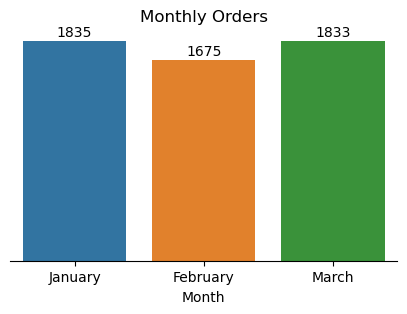

In [53]:
#plotting the total orders by month
fig, ax = plt.subplots(figsize=[5,3])

#ax.bar(x=month_orders['month_name'], height=month_orders['total_orders'])
sns.barplot(x=month_orders['month_name'], y=month_orders['total_orders'])

#remove spines and y-axis
sns.despine(left=True)
ax.yaxis.set_visible(False)

#add title
ax.set_title('Monthly Orders')
ax.set_xlabel('Month')
for index, value in enumerate(month_orders['total_orders']):
    ax.annotate(value, xy=(index, value+70), va='center', ha='center')
plt.show()

- The month of January had the highest number of orders

### MOM change in orders

In [55]:
#create a previous month order column
prev_mnth =[0]

#create a loop
x = np.arange(2)
for i in x:
    prev_mnth.append(month_orders['total_orders'][i])

month_orders['last_month_orders'] = prev_mnth
month_orders        

,month,month_name,total_orders,last_month_orders
0,1,January,1835,0
1,2,February,1675,1835
2,3,March,1833,1675


In [56]:
#creating a MoM Change
month_orders['%mom_change'] = round((month_orders['total_orders']- month_orders['last_month_orders'])
                                    /month_orders['last_month_orders']*100, 1)

In [57]:
#display the first three rows
month_orders

,month,month_name,total_orders,last_month_orders,%mom_change
0,1,January,1835,0,inf
1,2,February,1675,1835,-8.7
2,3,March,1833,1675,9.4


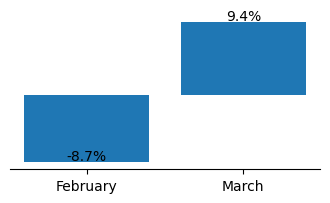

In [59]:
#plotting the total orders by month
fig, ax = plt.subplots(figsize=[4,2])

ax.bar(x=month_orders['month_name'], height=month_orders['%mom_change'])

#remove spines and y-axis
sns.despine(left=True)
ax.yaxis.set_visible(False)

#add title
#ax.set_title('% MoM change in Orders')

for index, value in enumerate(month_orders['%mom_change']):
    ax.annotate(str(value)+'%', xy=(index, value+0.8), va='center', ha='center')
plt.show()

- There is a 8.7% decrease in order in the month of febuary, but the order rose by 9.4% in March

### Which item is ordered most and least? 
### What Category does it belong?

### Top 10 Most Ordered menu item

In [61]:
#to get the top 10 most ordered items
top_10_ordered_items = (df.groupby(['item_name', 'category'], as_index=False)
                            .agg(total_orders=('order_id', 'count'))
                            .sort_values('total_orders', ascending=False).head(10))
top_10_ordered_items

,item_name,category,total_orders
14,Hamburger,American,622
10,Edamame,Asian,620
16,Korean Beef Bowl,Asian,588
3,Cheeseburger,American,583
13,French Fries,American,571
30,Tofu Pad Thai,Asian,562
29,Steak Torta,Mexican,489
26,Spaghetti & Meatballs,Italian,470
17,Mac & Cheese,American,463
9,Chips & Salsa,Mexican,461


### Monthly Orders of the top 5

In [175]:
mmm = df.pivot_table(index='item_name', columns='month', values='order_id', aggfunc='count')
mmm['total'] = mmm[1]+mmm[2]+mmm[3]
mmm = mmm.sort_values('total', ascending=False)
mmm.head(5)

month,1,2,3,total
item_name,,,,
Hamburger,206,187,229,622
Edamame,235,201,184,620
Korean Beef Bowl,182,194,212,588
Cheeseburger,197,200,186,583
French Fries,197,164,210,571


### Most ordered item

In [91]:
#To get the most ordered menu item
top_1_ordered_items = (df.groupby(['item_name', 'category'], as_index=False)
                            .agg(total_orders=('order_id', 'count'))
                            .sort_values('total_orders', ascending=False).head(1))
top_1_ordered_items

,item_name,category,total_orders
14,Hamburger,American,622


- The most ordered item is **Hamburger**

### Least 5 ordered menu items

In [92]:
#To get the least five ordered menu 
least_5_ordered_items = (df.groupby(['item_name', 'category'], as_index=False)
                            .agg(total_orders=('order_id', 'count'))
                            .sort_values('total_orders', ascending=False).tail(5))
least_5_ordered_items

,item_name,category,total_orders
2,Cheese Quesadillas,Mexican,233
28,Steak Tacos,Mexican,214
1,Cheese Lasagna,Italian,207
22,Potstickers,Asian,205
6,Chicken Tacos,Mexican,123


### The least ordered item

In [93]:
#To get the least ordered menu
least_ordered_items = (df.groupby(['item_name', 'category'], as_index=False)
                            .agg(total_orders=('order_id', 'count'))
                            .sort_values('total_orders', ascending=False).tail(1))
least_ordered_items

,item_name,category,total_orders
6,Chicken Tacos,Mexican,123


- The least ordered menu item is **Chicken Tacos**

### Orders by Category

In [94]:
#To get the total orders by category
cat_order = (df.groupby(['category'], as_index=False).agg(total_orders=('order_id', 'count'))
                 .sort_values('total_orders', ascending=False))
cat_order

,category,total_orders
1,Asian,3470
2,Italian,2948
3,Mexican,2945
0,American,2734


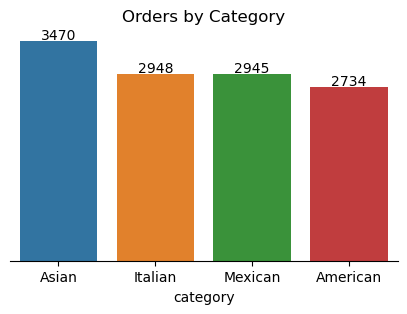

In [96]:
#plotting a bar chart of the orders by category
fig, ax = plt.subplots(figsize=[5,3])
sns.barplot(data=cat_order, x='category', y='total_orders')

#add title
ax.set_title('Orders by Category')

#remove spines and y-axis
sns.despine(left=True)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(cat_order['total_orders']):
    ax.annotate(values, xy=(index, values+90), ha='center', va='center')

plt.show()

### Menu items by category

In [97]:
#getting the number of menus in each category
menu_by_cat = (df.groupby(['category'], as_index=False).agg(total_menus=('item_name', 'nunique'))
                    .sort_values('total_menus', ascending=False))
menu_by_cat

,category,total_menus
2,Italian,9
3,Mexican,9
1,Asian,8
0,American,6


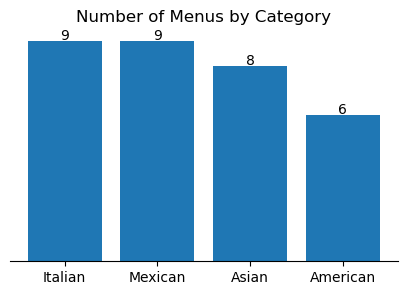

In [98]:
#plotting a bar chart of the number of menus by category
fig, ax = plt.subplots(figsize=[5,3])
ax.bar(x=menu_by_cat['category'], height=menu_by_cat['total_menus'])

#add title
ax.set_title('Number of Menus by Category')

#remove spines and y-axis
sns.despine(left=True)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(menu_by_cat['total_menus']):
    ax.annotate(values, xy=(index, values+0.2), ha='center', va='center')

plt.show()

## Hourly Orders

In [99]:
#creating the hourly orders dataframe
hourly_orders = df.groupby(['hour'], as_index=False).agg(total_orders=('order_id', 'nunique'))
hourly_orders

,hour,total_orders
0,10,2
1,11,286
2,12,644
3,13,590
4,14,423
5,15,354
6,16,479
7,17,618
8,18,595
9,19,497


## Hourly order trend

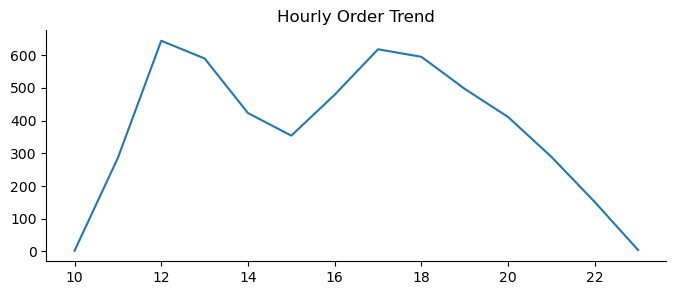

In [100]:
#plotting an hourly orders
fig, ax = plt.subplots(figsize=[8,3])

ax.plot(hourly_orders['hour'], hourly_orders['total_orders'])

#remove spine
sns.despine()

#add title
ax.set_title('Hourly Order Trend')

plt.show()

- The peak hour sales are 12pm, 1pm, 5pm and 6pm

### Each month order hour trend

In [101]:
#summarize using pivot table
each_mnth = df.pivot_table(index='hour', columns='month', values='order_id', aggfunc='nunique')

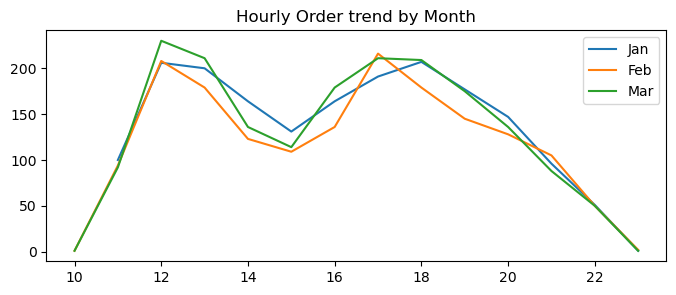

In [102]:
#plotting an hourly orders
fig, ax = plt.subplots(figsize=[8,3])

ax.plot(each_mnth.index, each_mnth[1], label='Jan')
ax.plot(each_mnth.index, each_mnth[2], label='Feb')
ax.plot(each_mnth.index, each_mnth[3], label='Mar')

ax.legend()
ax.set_title('Hourly Order trend by Month')
plt.show()

- Similiar Trends is occured in the order hours for each month. 12pm and 1pm had the highest orders
- The month of March had the highest order at these time periods

## Total Spends by Customers

In [119]:
#To get the top five customers that spend most and which items
top_5_spend_by_customers = (df.groupby(['order_id'], as_index=False)
                                .agg(total_menus=('order_id', 'count'),total_spends=('price', 'sum'))
                                .sort_values('total_spends', ascending=False)
                                .head())
top_5_spend_by_customers['order_id'] = top_5_spend_by_customers['order_id'].astype('str')

In [124]:
top_5_spend_by_customers

,order_id,total_menus,total_spends
435,440,14,192.15
2064,2075,13,191.05
1946,1957,14,190.10
325,330,14,189.70
2658,2675,14,185.10


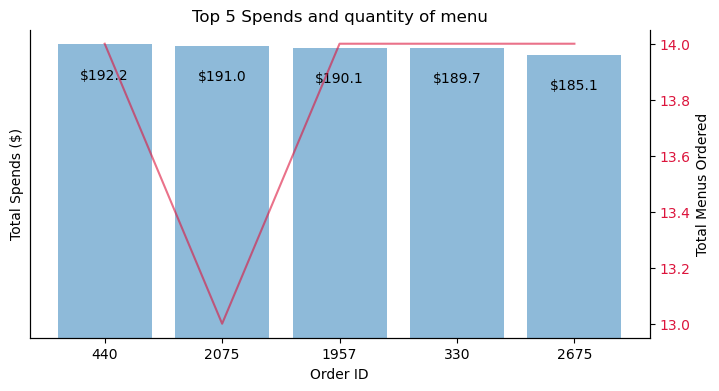

In [156]:
#plotting a bar chart of number of orders placed by category by the high spent customers
fig, ax = plt.subplots(figsize=[8,4])
ax.bar(x=top_5_spend_by_customers['order_id'], height=top_5_spend_by_customers['total_spends'], alpha=0.5)

ax1 = ax.twinx()

ax1.plot(top_5_spend_by_customers['order_id'] ,top_5_spend_by_customers['total_menus'], alpha=0.6, color='crimson')

#add label
ax.set_ylabel('Total Spends ($)')
ax1.set_ylabel('Total Menus Ordered')
ax.set_yticks([])
sns.despine(left=False, right=False)
ax.set_xlabel('Order ID')
ax1.tick_params(axis='y', labelcolor='crimson')

ax.set_title('Top 5 Spends and quantity of menu')

for i, v in enumerate(top_5_spend_by_customers['total_spends']):
    ax.annotate('$'+str(round(v, 1)), xy=(i, v-20), ha='center', va='center')
plt.show()

- The top 5 highest spend orders were between $185 - $192.

- Each of the four top spend orders contain 14 menus items, while one had 13 menus


In [157]:
#To get the category and number of orders placed by these top 5 spend
top_5_spend_cat_orders = (df[df['order_id'].isin ([440, 2075, 1957, 330, 2675])]
                            .groupby(['order_id', 'category'], as_index=False)
                            .agg(total_orders=('order_id', 'count')))
    
top_5_spend_cat_orders

,order_id,category,total_orders
0,330,American,1
1,330,Asian,6
2,330,Italian,3
3,330,Mexican,4
4,440,American,2
5,440,Asian,2
6,440,Italian,8
7,440,Mexican,2
8,1957,American,3
9,1957,Asian,3


In [158]:
#getting the high spend customer using their order_id
high_spend_customer = df[df['order_id'].isin ([440, 2075, 1957, 330, 2675])]

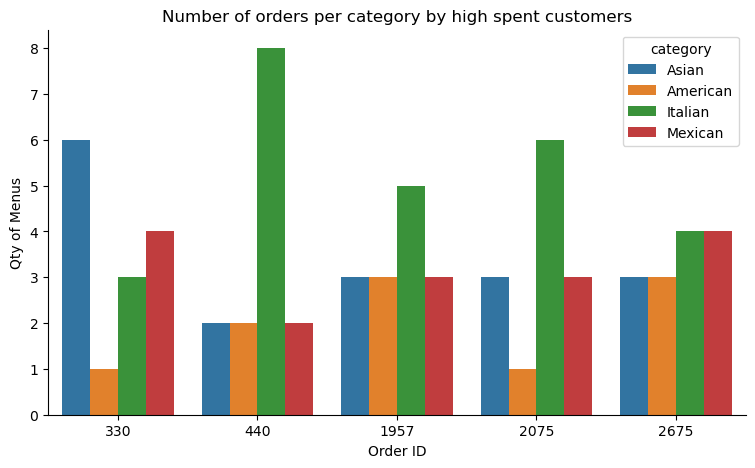

In [183]:
#plotting a bar chart of number of orders placed by category by the high spent customers
fig, ax = plt.subplots(figsize=[9,5])
sns.countplot(data=high_spend_customer, x='order_id', hue='category')

sns.despine()

#add title
ax.set_title('Number of orders per category by high spent customers')
ax.set_xlabel('Order ID')
ax.set_ylabel('Qty of Menus')
plt.show()

- The chart shows that our high spend customers made more purchase of the italian foods, and as such, we should focus on improving the menus

### Total Revenue by Menu Items

In [185]:
#generating the  revenue of each menu items
item_sales = (df.groupby(['item_name'], as_index=False)
                .agg(total_revenue=('price', 'sum'))
                .sort_values('total_revenue', ascending=False))

In [186]:
#display the ten top revenue generating menu items
item_sales.head(10)

,item_name,total_revenue
16,Korean Beef Bowl,10554.60
26,Spaghetti & Meatballs,8436.50
30,Tofu Pad Thai,8149.00
3,Cheeseburger,8132.85
14,Hamburger,8054.90
20,Orange Chicken,7524.00
11,Eggplant Parmesan,7119.00
29,Steak Torta,6821.55
5,Chicken Parmesan,6533.80
21,Pork Ramen,6462.00


In [187]:
#display the ten top revenue generating menu items and its category
item_sales_price = item_sales.merge(menu, on='item_name', how='left').drop('item_id', axis=1)
item_sales_price[['item_name', 'category','total_revenue']].head(10)

,item_name,category,total_revenue
0,Korean Beef Bowl,Asian,10554.60
1,Spaghetti & Meatballs,Italian,8436.50
2,Tofu Pad Thai,Asian,8149.00
3,Cheeseburger,American,8132.85
4,Hamburger,American,8054.90
5,Orange Chicken,Asian,7524.00
6,Eggplant Parmesan,Italian,7119.00
7,Steak Torta,Mexican,6821.55
8,Chicken Parmesan,Italian,6533.80
9,Pork Ramen,Asian,6462.00


## Summary

- The orders is generally the same, except for February where there is 8.7% drop, which step up in March
- There are four peak order hours: 12pm, 1pm, 5pm, and 6pm. These hours account for 45% of the total orders and as such the business should focus more at these hours and have manpower to fulfill the orders
- Hamburger is the most ordered. The business should consider dropping the least ordered item; the Chicken tacos
- The Italian Cuisine is the most ordered category among our top spend customers, so the business should focus on developing its menus
- Based on the orders and revenue, these menus items Hamburger & Cheeseburger (American), Korean beef bowl & Tofu pad Thai (Asian), Spaghetti & Meatballs (Italian) and Steak Torta (Mexican) are menus worth keeping and developing in each cuisine